In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
alpha = 8#Train set size
path = "Datasets/Training/s"
train_set = np.ndarray(shape=(40,alpha,112*92),dtype = np.integer)
for c in range(40):
    for i in range(alpha):
        image = plt.imread(path + str(c+1) + "/" + str(i+1)+".pgm")
        #print(c+1,i+1,np.shape(image))
        image = np.reshape(image,(112*92))
        #print(np.shape(image))
        train_set[c][i] = image
print(np.shape(train_set))

(40, 8, 10304)


(10304,)


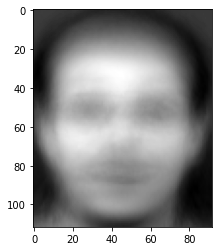

In [51]:
#Calculating mean
M = np.zeros(shape=(112*92),dtype = np.float)
for c in range(40):
    for i in range(alpha):
        for p in range(112*92):
            M[p] += train_set[c][i][p]
print(np.shape(M))
M = M/(40*alpha)
#print(M)

#print mean_image
mean_image = np.reshape(M,(112,92))
plt.imshow(mean_image, cmap='gray')
plt.show()

In [52]:
#subracting mean
d1 = np.ndarray(shape=(40,alpha,112*92),dtype = np.float)
for c in range(40):
    for i in range(alpha):
        d1[c][i] = np.subtract(train_set[c][i],M)
print(d1.shape)

(40, 8, 10304)


In [53]:
#calculating surrogate covariance matrix          
d1 = np.reshape(d1,(40*alpha,112*92))
sigma = np.ndarray(shape = (40*alpha,40*alpha), dtype = np.float)
sigma = np.cov(d1.T,rowvar=False,bias=True)
print('Covariance Matrix')
print(sigma)
print(sigma.shape)

Covariance Matrix
[[1161.06039202  106.43380631  626.80254837 ...  -92.99104235
  -114.29714499 -107.87218984]
 [ 106.43380631 1333.05663197  361.45235495 ...   51.54060336
  -127.08949923   60.20060227]
 [ 626.80254837  361.45235495 1528.18086098 ...  130.09005523
   -62.06088933   92.88541542]
 ...
 [ -92.99104235   51.54060336  130.09005523 ... 1161.33598233
   134.46610044  842.71595804]
 [-114.29714499 -127.08949923  -62.06088933 ...  134.46610044
   871.05172577  166.3784388 ]
 [-107.87218984   60.20060227   92.88541542 ...  842.71595804
   166.3784388  1170.84976818]]
(320, 320)


In [54]:
#calculating eigen values and eigen vectors
eigV = np.linalg.eig(sigma)
eig_Values = eigV[0]
eig_Vectors = eigV[1]
print(eig_Values.shape)
print(eig_Vectors.shape)

(320,)
(320, 320)


In [55]:
def calc(k):
    #Now extract k directions
    selected_vectors = eig_Vectors[:,: k]
    #print(np.shape(selected_vectors))
    #Generating eigenFaces
    eig_faces = np.ndarray(shape = (40*alpha,112*92),dtype = np.float)
    eig_faces = np.dot(selected_vectors.T,d1)
    #print(eig_faces.shape)
    #print(eig_faces)

    #Calculating signature of each face
    signature = np.ndarray(shape = (k,40*alpha),dtype = np.float)
    signature = np.dot(eig_faces,d1.T)
    #print(np.shape(signature))
    #print(signature)
    
    return eig_faces,signature

In [56]:
#testing
def testing(eig_faces,signature,beta):
    No_of_matched = 0
    path = "Datasets/Testing/s"
    for c in range(40):
        for i in range(beta):
            image = plt.imread(path + str(c+1) + "/" + str(i+1)+ ".pgm")
            #print(np.shape(image))
            image = np.reshape(image,(112*92))
            #normalizing image by subracting mean
            img = np.subtract(image,M)
            #projected test face
            test_weights = np.dot(eig_faces,img)
            #print(np.shape(test_weights))
            #Classify the image
            matched_image = np.argmin(np.linalg.norm(test_weights-signature.T,axis=1))
            classified_class = int(matched_image/alpha)
        
            if classified_class == c:
                No_of_matched = No_of_matched+1
    return No_of_matched

In [57]:
#testing and calculating accuracy
k_list = list()
accuracy_list = list()
for k in range(1,40*alpha):
    eigen_faces,signature = calc(k)
    beta = 2#Train set size
    No_of_matched = testing(eigen_faces,signature,beta)
    accuracy = (No_of_matched/(beta*40))*100
    #print(k,accuracy)
    k_list.append(k)
    accuracy_list.append(accuracy)

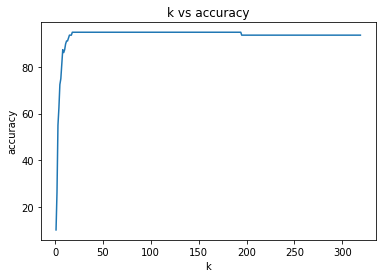

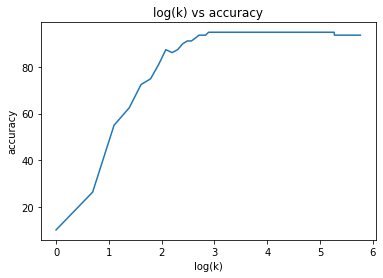

In [58]:
#Plotting a graph k vs accuracy
plt.plot(k_list, accuracy_list)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("k vs accuracy")
plt.show()
#Plotting a graph log(k) vs accuracy
plt.plot(np.log(k_list), accuracy_list)
plt.xlabel("log(k)")
plt.ylabel("accuracy")
plt.title("log(k) vs accuracy")
plt.show()

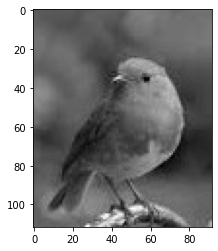

Not Matched


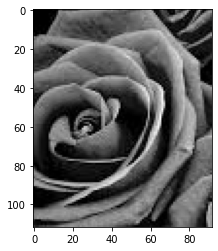

Not Matched


In [59]:
#imposter in test set
for i in range(2):
    path = "Datasets/Testing/imposter"
    image = plt.imread(path + str(i+1) + ".jpeg")
    #print(np.shape(image))
    img = image[:,:,0]
    #print(np.shape(img))

    #display the image
    plt.imshow(img, cmap='gray')
    plt.show()

    img = np.reshape(img,(112*92))
    #print(np.shape(img))
    #normalizing image by subracting mean
    img = np.subtract(img,M)
    #projected test face
    eig_faces,signature = calc(100)
    test_weights = np.dot(eig_faces,img)
    #print(np.shape(test_weights))

    #Classify the image
    max_dist = np.argmin(np.linalg.norm(d1))
    min_dist = np.argmax(np.linalg.norm(d1))

    imposter_dist = np.linalg.norm(img)

    if imposter_dist<min_dist or imposter_dist>max_dist:
        print("Not Matched")